# Project Introduction
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# Problem statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,RMSprop
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import itertools

In [2]:
train_data_dir='train'
validation_data_dir='test'

In [3]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:4]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(4, 4, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

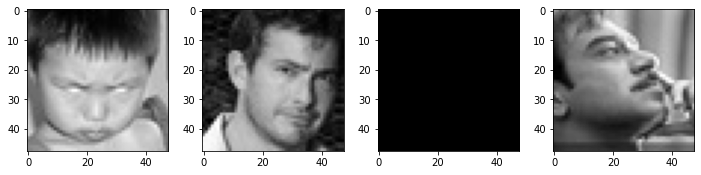

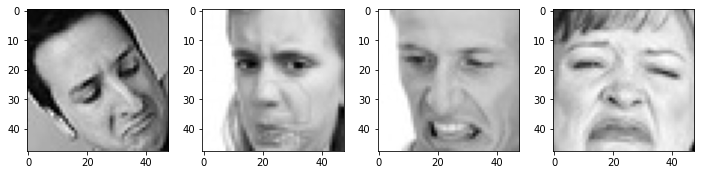

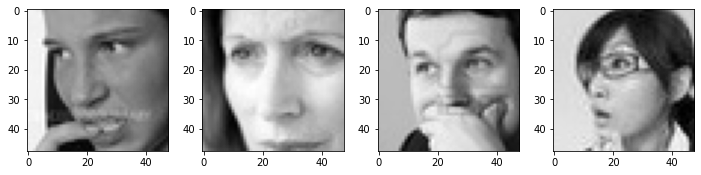

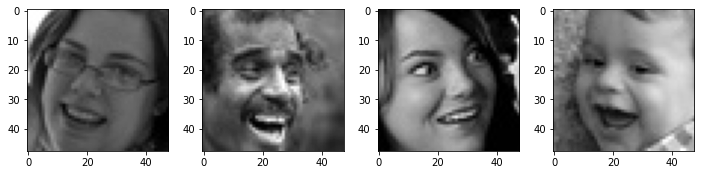

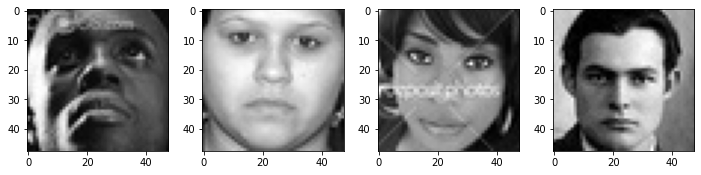

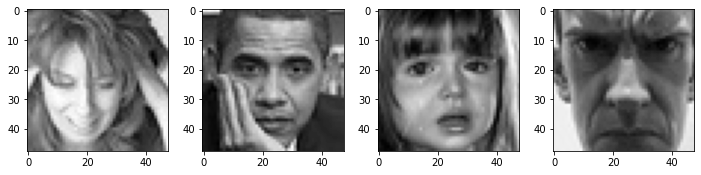

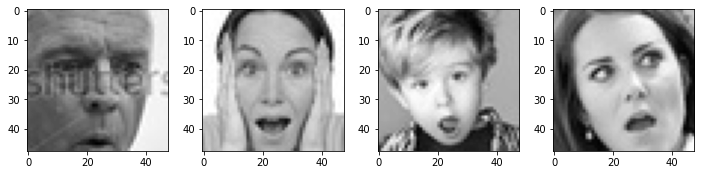

In [4]:
#angry class
plot_images(train_data_dir+'/angry')
#disgust class
plot_images(train_data_dir+'/disgust')
#fear class
plot_images(train_data_dir+'/fear')
#happy class
plot_images(train_data_dir+'/happy')
#neutral class
plot_images(train_data_dir+'/neutral')
#sad class
plot_images(train_data_dir+'/sad')
#surprise class
plot_images(train_data_dir+'/surprise')

# ResNet

In [5]:
# resnet is trained on rgb photos and we have grascaled images so converting colour mode to rgb
training_gen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
validation_gen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)

In [7]:
# size of image and batch
######################
img_size = 48         
batch_size = 32       
#######################  

train_generator = training_gen.flow_from_directory(train_data_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

validation_generator = validation_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
# creating a base model using resnet 
# and loading the pretrained weights 
base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 160s 2us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                        

 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 12, 12, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 12, 12, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 12, 12, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 6, 6, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 6, 6, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_blo

 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 3, 3, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 2, 2, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

In [10]:
# making all the layers except last 4 layers non trainable 
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [13]:
# Build model on the top of base model
##########
epochs=50
batch_size = 32 
###########

model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(7, activation='softmax'))


# Final model summary
model.summary()


# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


steps_per_epoch=train_generator.n//train_generator.batch_size

validation_steps=validation_generator.n//validation_generator.batch_size


# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')



# to save model weights to my drive loaction
weight_checkpoint_path = 'model_weights_resnet.h5'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]


# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                      

Epoch 21/50
898/898 [==============================] - ETA: 0s - loss: 1.5508 - accuracy: 0.3920
Epoch 21: saving model to model_weights_resnet.h5
898/898 [==============================] - 161s 180ms/step - loss: 1.5508 - accuracy: 0.3920 - val_loss: 1.5723 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 22/50
898/898 [==============================] - ETA: 0s - loss: 1.5422 - accuracy: 0.3994
Epoch 22: saving model to model_weights_resnet.h5
898/898 [==============================] - 162s 180ms/step - loss: 1.5422 - accuracy: 0.3994 - val_loss: 1.5908 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 23/50
898/898 [==============================] - ETA: 0s - loss: 1.5376 - accuracy: 0.3995
Epoch 23: saving model to model_weights_resnet.h5
898/898 [==============================] - 163s 181ms/step - loss: 1.5376 - accuracy: 0.3995 - val_loss: 1.6596 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 24/50
898/898 [==============================] - ETA: 0s - loss: 1.5336 - accuracy: 0.3994
Epoch 24: saving m

# Plotting Accuracy & Loss to analyze the results

<AxesSubplot:>

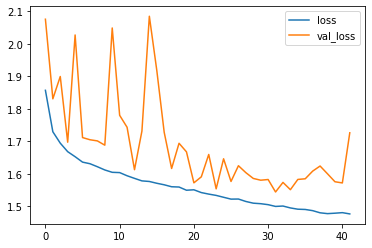

In [14]:
# save history of the model in dataframe df_modelhis
df_modelhis=pd.DataFrame(model.history.history)

df_modelhis[['loss','val_loss']].plot()
#Plotting Loss

<AxesSubplot:>

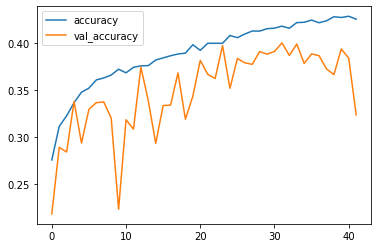

In [15]:
#Plotting accuracy
df_modelhis[['accuracy','val_accuracy']].plot()



 
 
 # Results

From above plot, we can see that Model accuracy is not so good to implement in real scenario.
So let's try to build our own custom model and comapre both of results.

# CNN

In [5]:
# Creating Image generators, for train, validation dataset
training_gen=ImageDataGenerator(rescale=1./255)
validation_gen=ImageDataGenerator(rescale=1./255)

In [6]:
# Creating  Training Dataset
train_gen=training_gen.flow_from_directory(train_data_dir,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set
valid_gen=validation_gen.flow_from_directory(validation_data_dir,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
####################
epochs = 48
no_of_classes = 7
learning_rate = 0.001
#####################


model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

 #fitting the model

results = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//valid_gen.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\Gaurav Gade\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-7-17bc86dbcf0f>:90: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(generator=train_gen,


897/897 [==============================] - 437s 485ms/step - loss: 1.7067 - accuracy: 0.3419 - val_loss: 1.6115 - val_accuracy: 0.4203 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 436s 486ms/step - loss: 1.3591 - accuracy: 0.4778 - val_loss: 1.3799 - val_accuracy: 0.4602 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 438s 488ms/step - loss: 1.2467 - accuracy: 0.5248 - val_loss: 1.5956 - val_accuracy: 0.4379 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 432s 482ms/step - loss: 1.1776 - accuracy: 0.5536 - val_loss: 1.1640 - val_accuracy: 0.5594 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 442s 493ms/step - loss: 1.1254 - accuracy: 0.5744 - val_loss: 1.1730 - val_accuracy: 0.5466 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 509s 568ms/step - loss: 1.0713 - accuracy: 0.5948 - val_loss: 1.1417 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 7/40
897/897 [==============================] - 444

### Our best model managed to obtain a accuracy of approximately 71% and val_accuracy of 62% on the dataset by running 40 epochs which is quite good.

### At each epoch, Keras checks if our model performed better than the models of the previous epochs.

In [13]:
# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=valid_gen.classes)                         
cm

array([[ 508,   14,   50,   29,  152,  190,   15],
       [  23,   64,    0,    3,    4,   16,    1],
       [  94,   12,  313,   27,  161,  330,   87],
       [  48,    1,   36, 1339,  206,  109,   35],
       [  64,    0,   27,   35,  830,  271,    6],
       [  93,    7,   54,   35,  275,  767,   16],
       [  24,    2,   52,   27,   55,   37,  634]], dtype=int64)

In [17]:
 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=valid_gen.classes)
acc       

0.6206464196154918

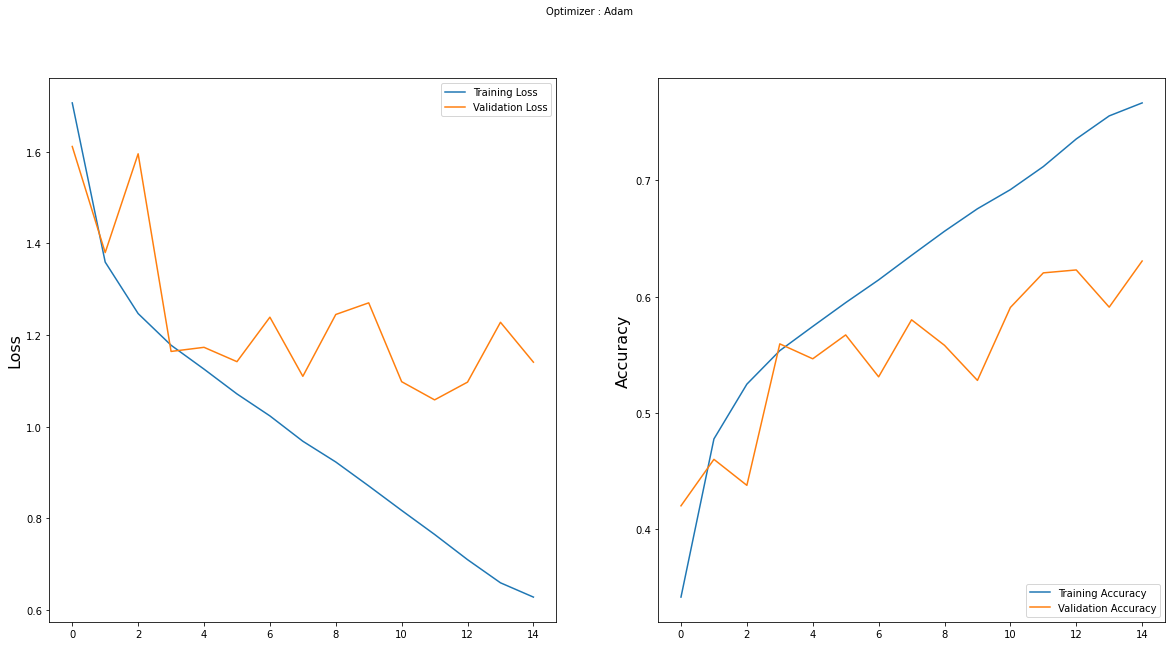

In [15]:
#Plotting Accuracy & Loss
# plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### The training loss is slightly higher than the validation loss for the first epochs.

<ipython-input-30-f75820b90571>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_gen)


<Figure size 640x480 with 0 Axes>

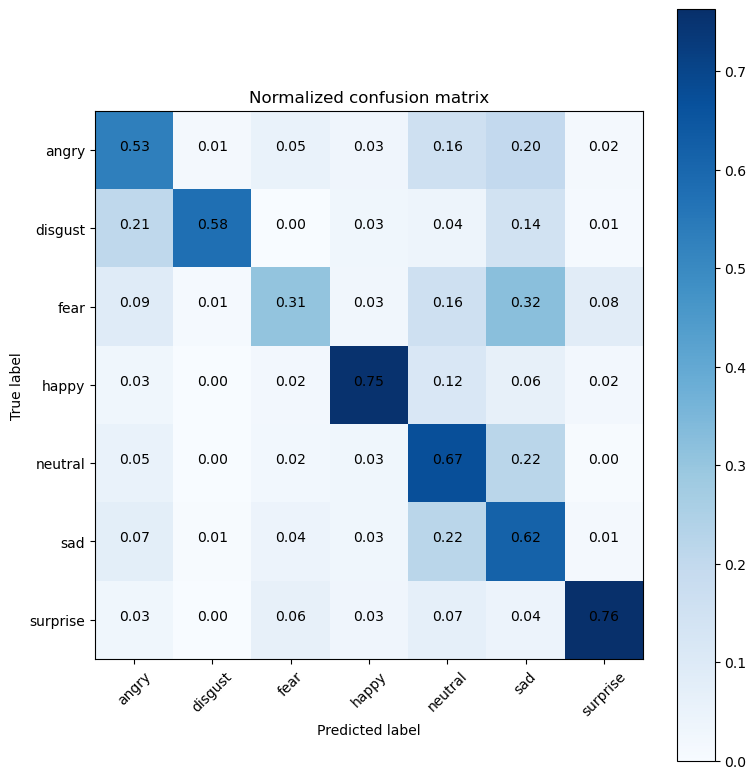

In [30]:
# show the confusion matrix of our predictions

# compute prediction
predictions = model.predict_generator(generator=valid_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = valid_gen.classes
class_names = valid_gen.class_indices.keys()
plt.style.use('default')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 )

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

### Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces maybe because it confuses them with sad faces.

In [10]:
# Save the model
model.save('custom_model_result.h5')


### The training gave the accuracy of 71% and val_accuracy of 62%. It seems good. So, I save the model and detection we got from live video is good.

# Conclusion

### We trained the neural network and we achieved the highest validation accuracy of 62%.

### Pre Trained Model didn't gave appropriate result.

### The application is able to detect face location and predict the right expression while checking it on a local webcam.

### The front-end of the model was made using streamlit for webapp and running well on local webapp link.

### Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit that runs on a web server.

### Our Model can succesfully detect face and predict emotion on live video feed as well as on an image.